In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import model_selection

In [3]:
train = pd.read_csv('D:\TrainGL.csv')


In [4]:
test = pd.read_csv('D:\TestGL.csv')

In [150]:
train.head(10)

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50
5,25006,skoda,octavia,Chennai,12015.0,First,2015,4,1968,110.0,NaN,4,man,4,5,diesel,1543728.75
6,25007,skoda,superb,Coimbatore,181000.0,Fourth & Above,2009,10,1968,125.0,NaN,6,auto,5,5,diesel,915985.50
7,25008,fiat,panda,Chennai,33100.0,Second,2010,9,1108,40.0,NaN,5,man,5,5,petrol,327535.50
8,25009,nissan,qashqai,Coimbatore,17375.0,First,2015,4,1600,96.0,NaN,5,man,4,5,diesel,1361480.25
9,25010,skoda,superb,Mumbai,97640.0,Fourth & Above,2010,9,2000,103.0,NaN,6,man,5,5,diesel,885455.25


In [151]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [152]:
train.shape,test.shape

((53515, 17), (5615, 16))

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
Id                     53515 non-null int64
Maker                  53515 non-null object
model                  53515 non-null object
Location               53515 non-null object
Distance               52304 non-null float64
Owner Type             53515 non-null object
manufacture_year       53515 non-null int64
Age of car             53515 non-null int64
engine_displacement    53515 non-null int64
engine_power           52076 non-null float64
body_type              4136 non-null object
Vroom Audit Rating     53515 non-null int64
transmission           53515 non-null object
door_count             53515 non-null object
seat_count             53515 non-null object
fuel_type              53515 non-null object
Price                  53515 non-null float64
dtypes: float64(3), int64(5), object(9)
memory usage: 6.9+ MB


In [154]:
ms = pd.DataFrame(100*train.isnull().sum()/len(train),columns=["percentage of missing values"]).sort_values(ascending=False,by
                                                                                                       ="percentage of missing values")

In [155]:
ms

,percentage of missing values
body_type,92.271326
engine_power,2.688966
Distance,2.262917
Id,0.000000
fuel_type,0.000000
seat_count,0.000000
door_count,0.000000
transmission,0.000000
Vroom Audit Rating,0.000000
engine_displacement,0.000000


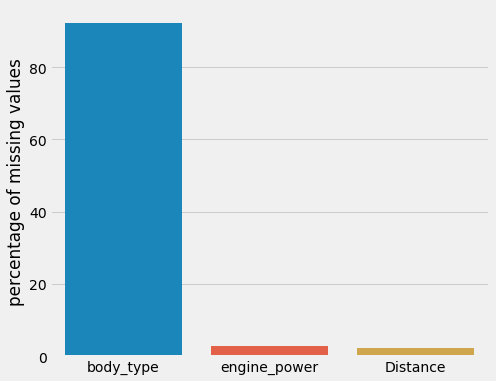

In [156]:
plt.figure(figsize=(7,6))
plt.style.use("fivethirtyeight")
sns.barplot(x=ms.index[:3],y=ms["percentage of missing values"][:3])
plt.show()

In [5]:
train1 = train.drop(['seat_count','door_count'],axis = 1)

In [6]:
test1 = test.drop(['seat_count','door_count'],axis = 1)

In [159]:
cat_col = train1.select_dtypes(['object']).columns
cat_col 

Index(['Maker', 'model', 'Location', 'Owner Type', 'body_type', 'transmission',
       'fuel_type'],
      dtype='object')

In [160]:
train['body_type'].value_counts()

compact    4127
van           9
Name: body_type, dtype: int64

In [7]:
train1['body_type'].fillna('others',inplace = True)

In [8]:
test1['body_type'].fillna('others',inplace = True)

In [9]:
train1['engine_power'].fillna(train1['engine_power'].median(),inplace=True)
test1['engine_power'].fillna(test1['engine_power'].median(),inplace=True)

In [10]:
train1['Distance'].fillna(train1['Distance'].median(),inplace = True)
test1['Distance'].fillna(test1['Distance'].median(),inplace = True)

In [11]:
train1.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom Audit Rating     0
transmission           0
fuel_type              0
Price                  0
dtype: int64

In [12]:
test1.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
body_type              0
Vroom Audit Rating     0
transmission           0
fuel_type              0
dtype: int64

In [167]:
# handling cat values

cat_col

Index(['Maker', 'model', 'Location', 'Owner Type', 'body_type', 'transmission',
       'fuel_type'],
      dtype='object')

In [127]:
train1['Location'].value_counts() # Lable encoding

Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

In [128]:
train1['Maker'].value_counts() #get dummies

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [129]:
train1['model'].value_counts() # Lable encoding

octavia     12619
superb       3195
yaris        3176
qashqai      2854
x3           2779
x1           2420
i30          2047
q5           2039
x5           1979
yeti         1898
panda        1769
q3           1736
coupe        1710
micra        1676
auris        1666
avensis      1512
aygo         1486
rapid        1409
roomster     1322
q7           1245
citigo       1120
juke          955
tt            903
Name: model, dtype: int64

In [130]:
train1['fuel_type'].value_counts() # Lable encoding

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

In [131]:
train1['transmission'].value_counts() # Lable encoding

man     36734
auto    16781
Name: transmission, dtype: int64

In [132]:
train1['Owner Type'].value_counts() #value encoding

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

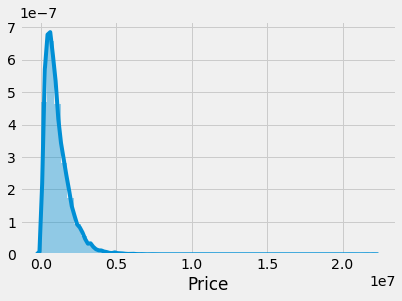

In [133]:
sns.distplot(train1['Price'])

In [134]:
train1.drop_duplicates(subset='Id', keep='first', inplace=True)

0

In [137]:
test.drop_duplicates(subset='Id', keep='first', inplace=True)  #No duplicates in train and test

In [139]:
test.shape,test['Id'].isnull().sum()

((5615, 16), 0)

In [13]:
train_cat1=train1[['model','fuel_type','transmission','Location','body_type']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_cat1 = train_cat1.apply(le.fit_transform)
train_cat1.head()

,model,fuel_type,transmission,Location,body_type
0,8,1,1,0,0
1,9,1,1,0,1
2,18,0,0,5,1
3,6,1,1,9,1
4,20,0,0,6,1


In [14]:
train1 = train1.drop(['model','fuel_type','transmission','Location','body_type'],axis=1)
train1= pd.concat([train1, train_cat1], axis=1)
train1.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,model,fuel_type,transmission,Location,body_type
0,25001,skoda,65520.0,Second,1964,55,1964,147.0,8,543764.25,8,1,1,0,0
1,25002,fiat,27750.0,Third,2012,7,1242,51.0,6,401819.25,9,1,1,0,1
2,25003,bmw,46000.0,Third,2014,5,1995,105.0,7,2392855.50,18,0,0,5,1
3,25004,nissan,43949.0,Third,2011,8,1618,140.0,7,958606.50,6,1,1,9,1
4,25005,bmw,59524.0,Fourth & Above,2012,7,2993,180.0,7,3085561.50,20,0,0,6,1


In [15]:

train_cat2 = pd.get_dummies(train1['Maker'])
train1 = pd.concat([train1, train_cat2],axis = 1)

train1.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
0,25001,skoda,65520.0,Second,1964,55,1964,147.0,8,543764.25,...,0,0,0,0,0,0,0,0,1,0
1,25002,fiat,27750.0,Third,2012,7,1242,51.0,6,401819.25,...,0,1,0,0,1,0,0,0,0,0
2,25003,bmw,46000.0,Third,2014,5,1995,105.0,7,2392855.50,...,5,1,0,1,0,0,0,0,0,0
3,25004,nissan,43949.0,Third,2011,8,1618,140.0,7,958606.50,...,9,1,0,0,0,0,0,1,0,0
4,25005,bmw,59524.0,Fourth & Above,2012,7,2993,180.0,7,3085561.50,...,6,1,0,1,0,0,0,0,0,0


AttributeError: 'NoneType' object has no attribute 'head'

In [16]:
train1['Owner Type'] = train1['Owner Type'].astype('category')

train1['Owner Type'] = train1['Owner Type'].cat.codes
train1.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
0,25001,skoda,65520.0,2,1964,55,1964,147.0,8,543764.25,...,0,0,0,0,0,0,0,0,1,0
1,25002,fiat,27750.0,3,2012,7,1242,51.0,6,401819.25,...,0,1,0,0,1,0,0,0,0,0
2,25003,bmw,46000.0,3,2014,5,1995,105.0,7,2392855.50,...,5,1,0,1,0,0,0,0,0,0
3,25004,nissan,43949.0,3,2011,8,1618,140.0,7,958606.50,...,9,1,0,0,0,0,0,1,0,0
4,25005,bmw,59524.0,1,2012,7,2993,180.0,7,3085561.50,...,6,1,0,1,0,0,0,0,0,0


In [172]:
train1['Owner Type'].value_counts()

0    13406
3    13395
2    13365
1    13349
Name: Owner Type, dtype: int64

In [17]:
train1['Owner Type'] = train1['Owner Type'].astype(int)

In [19]:
train1 = train1.drop('Maker',axis = 1)

In [20]:
cat = train1.select_dtypes('object')
cat.head()

""
0
1
2
3
4


In [21]:
test_cat1=test1[['model','fuel_type','transmission','Location','body_type']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_cat1 = test_cat1.apply(le.fit_transform)
test_cat1.head()

,model,fuel_type,transmission,Location,body_type
0,8,1,1,9,1
1,14,0,1,3,1
2,8,0,1,3,1
3,10,0,0,4,1
4,17,1,0,2,1


In [22]:
test1 = test1.drop(['model','fuel_type','transmission','Location','body_type'],axis=1)
test1= pd.concat([test1, test_cat1], axis=1)
test1.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,model,fuel_type,transmission,Location,body_type
0,11001,skoda,150000.0,First,2007,12,1595,75.0,5,8,1,1,9,1
1,11002,skoda,29376.0,Third,2014,5,1598,77.0,4,14,0,1,3,1
2,11003,skoda,30563.0,Second,2014,5,1968,110.0,5,8,0,1,3,1
3,11004,audi,8650.0,Fourth & Above,2015,4,1968,110.0,8,10,0,0,4,1
4,11005,audi,6400.0,Third,2015,4,1984,169.0,4,17,1,0,2,1


In [23]:

test_cat2 = pd.get_dummies(test1['Maker'])
test1 = pd.concat([test1, test_cat2],axis = 1)

test1.head()

,Id,Maker,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,model,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
0,11001,skoda,150000.0,First,2007,12,1595,75.0,5,8,...,9,1,0,0,0,0,0,0,1,0
1,11002,skoda,29376.0,Third,2014,5,1598,77.0,4,14,...,3,1,0,0,0,0,0,0,1,0
2,11003,skoda,30563.0,Second,2014,5,1968,110.0,5,8,...,3,1,0,0,0,0,0,0,1,0
3,11004,audi,8650.0,Fourth & Above,2015,4,1968,110.0,8,10,...,4,1,1,0,0,0,0,0,0,0
4,11005,audi,6400.0,Third,2015,4,1984,169.0,4,17,...,2,1,1,0,0,0,0,0,0,0


In [24]:
test1 = test1.drop('Maker',axis = 1)

In [25]:
test1.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,model,fuel_type,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
0,11001,150000.0,First,2007,12,1595,75.0,5,8,1,...,9,1,0,0,0,0,0,0,1,0
1,11002,29376.0,Third,2014,5,1598,77.0,4,14,0,...,3,1,0,0,0,0,0,0,1,0
2,11003,30563.0,Second,2014,5,1968,110.0,5,8,0,...,3,1,0,0,0,0,0,0,1,0
3,11004,8650.0,Fourth & Above,2015,4,1968,110.0,8,10,0,...,4,1,1,0,0,0,0,0,0,0
4,11005,6400.0,Third,2015,4,1984,169.0,4,17,1,...,2,1,1,0,0,0,0,0,0,0


In [26]:
test1['Owner Type'] = test1['Owner Type'].astype('category')

test1['Owner Type'] = test1['Owner Type'].cat.codes
test1.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,model,fuel_type,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
0,11001,150000.0,0,2007,12,1595,75.0,5,8,1,...,9,1,0,0,0,0,0,0,1,0
1,11002,29376.0,3,2014,5,1598,77.0,4,14,0,...,3,1,0,0,0,0,0,0,1,0
2,11003,30563.0,2,2014,5,1968,110.0,5,8,0,...,3,1,0,0,0,0,0,0,1,0
3,11004,8650.0,1,2015,4,1968,110.0,8,10,0,...,4,1,1,0,0,0,0,0,0,0
4,11005,6400.0,3,2015,4,1984,169.0,4,17,1,...,2,1,1,0,0,0,0,0,0,0


In [27]:
test1['Owner Type'] = test1['Owner Type'].astype(int)

In [28]:
test1.isnull().sum()

Id                     0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
model                  0
fuel_type              0
transmission           0
Location               0
body_type              0
audi                   0
bmw                    0
fiat                   0
hyundai                0
maserati               0
nissan                 0
skoda                  0
toyota                 0
dtype: int64

In [189]:
train1.isnull().sum()

Id                     0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
Price                  0
model                  0
fuel_type              0
transmission           0
Location               0
body_type              0
audi                   0
bmw                    0
fiat                   0
hyundai                0
maserati               0
nissan                 0
skoda                  0
toyota                 0
dtype: int64

In [45]:
sc = StandardScaler()
trains = train1.drop(['Price','Location','Id','model'],axis = 1)
trains1 = sc.fit_transform(trains)
tests = test1.drop(['Location','Id','model'],axis = 1)
tests1 = sc.transform(tests)
y = train1['Price']

In [46]:
import statsmodels.api as sm
X_constant = sm.add_constant(trains1)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     8245.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:14:47   Log-Likelihood:            -7.7295e+05
No. Observations:               53515   AIC:                         1.546e+06
Df Residuals:                   53498   BIC:                         1.546e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.098e+06   1960.366    560.142      0.000    1.09e+06     1.1e+06
x1         -4.263e+04   2038.549    -20.911      0.000   -4.66e+04   -3.86e+04
x2         -1893.9960   1960.727     -0.966      0.334   -5737.037    1949.045
x3          1.818e+05   1050.909    173.012      0.000     1.8e+05    1.84e+05
x4         -1.818e+05   1050.909   -173.012      0.000   -1.84e+05    -1.8e+05
x5          9365.5664   2177.654      4.301      0.000    5097.347    1.36e+04
x6          2.449e+05   2908.355     84.203      0.000    2.39e+05    2.51e+05
x7          1967.3746   1960.637      1.003      0.316   -1875.490    5810.239
x8         -5.411e+04   2191.604    -24.691      0.000   -5.84e+04   -4.98e+04
x9         -1.169e+05   2359.924    -49.542      0.000   -1.22e+05   -1.12e+05
x10         1.678e+04   2221.098      7.555      0.000    1.24e+04    2.11e+04
x11         1.903e+05   1998.872     95.222      0.000    1.86e+05    1.94e+05
x12         9.548e+04   1976.949     48.299      0.000    9.16e+04    9.94e+04
x13        -3.265e+04   1978.522    -16.504      0.000   -3.65e+04   -2.88e+04
x14        -6.148e+04   1892.037    -32.495      0.000   -6.52e+04   -5.78e+04
x15          1.02e+04   1986.281      5.134      0.000    6304.726    1.41e+04
x16        -3.042e+04   1783.014    -17.061      0.000   -3.39e+04   -2.69e+04
x17        -8.781e+04   1473.727    -59.584      0.000   -9.07e+04   -8.49e+04
x18        -7.825e+04   1809.726    -43.240      0.000   -8.18e+04   -7.47e+04
==============================================================================
Omnibus:                    59862.426   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32514472.570
Skew:                           5.120   Prob(JB):                         0.00
Kurtosis:                     123.320   Cond. No.                     1.68e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
train1.columns

Index(['Id', 'Distance', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'model', 'fuel_type', 'transmission', 'Location', 'body_type', 'audi',
       'bmw', 'fiat', 'hyundai', 'maserati', 'nissan', 'skoda', 'toyota'],
      dtype='object')

In [193]:
train1.corr()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,model,...,Location,body_type,audi,bmw,fiat,hyundai,maserati,nissan,skoda,toyota
Id,1.000000,-0.000258,0.003215,0.001935,-0.001935,0.003698,0.002459,0.005602,0.003195,-0.001851,...,0.006328,0.006491,0.005468,-0.004218,-0.001154,-0.007130,0.000697,-0.002621,-0.000230,0.005897
Distance,-0.000258,1.000000,-0.004258,-0.217804,0.217804,0.091652,0.009684,-0.006235,-0.155366,-0.008275,...,0.004632,-0.194584,-0.031593,-0.001518,-0.018756,-0.033518,-0.003898,-0.049495,0.099507,-0.034445
Owner Type,0.003215,-0.004258,1.000000,-0.004829,0.004829,0.002344,0.003259,0.000595,-0.003125,0.005100,...,0.006910,-0.007231,-0.003442,0.005643,-0.002582,0.009705,0.003139,-0.008185,0.002381,-0.002775
manufacture_year,0.001935,-0.217804,-0.004829,1.000000,-1.000000,-0.090401,0.048981,0.003985,0.506707,0.064531,...,-0.004839,0.251795,0.063024,0.024709,-0.067636,0.070426,-0.045784,0.045437,-0.088300,-0.003109
Age of car,-0.001935,0.217804,0.004829,-1.000000,1.000000,0.090401,-0.048981,-0.003985,-0.506707,-0.064531,...,0.004839,-0.251795,-0.063024,-0.024709,0.067636,-0.070426,0.045784,-0.045437,0.088300,0.003109
engine_displacement,0.003698,0.091652,0.002344,-0.090401,0.090401,1.000000,0.312616,-0.005828,0.162072,0.092360,...,0.004376,-0.259085,0.125032,0.179478,-0.085442,-0.035966,0.041190,-0.086937,-0.022553,-0.127313
engine_power,0.002459,0.009684,0.003259,0.048981,-0.048981,0.312616,1.000000,-0.001641,0.620668,0.219466,...,-0.000883,0.054969,0.471431,0.383783,-0.203683,-0.083043,0.111060,-0.140766,-0.222374,-0.255196
Vroom Audit Rating,0.005602,-0.006235,0.000595,0.003985,-0.003985,-0.005828,-0.001641,1.000000,0.005109,0.005670,...,-0.001048,0.007610,0.001031,0.004008,0.001877,-0.002589,0.005966,0.000387,0.001210,-0.006828
Price,0.003195,-0.155366,-0.003125,0.506707,-0.506707,0.162072,0.620668,0.005109,1.000000,0.239013,...,-0.003695,0.203756,0.483625,0.329526,-0.148800,-0.081756,0.029738,-0.070427,-0.290755,-0.203160
model,-0.001851,-0.008275,0.005100,0.064531,-0.064531,0.092360,0.219466,0.005670,0.239013,1.000000,...,-0.002771,0.039133,-0.058637,0.491346,-0.074947,-0.214409,-0.031295,-0.070804,-0.034736,-0.145171


In [197]:
sns.set(style = 'whitegrid')

d1 = train1.copy(deep = True)
d1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0        3.162815e+06
1       -2.628034e+05
2        4.561530e+05
3       -1.848044e+05
4        8.768339e+05
             ...     
53510    2.803326e+05
53511   -1.374826e+05
53512   -8.887045e+03
53513    1.999766e+05
53514   -2.677195e+05
Length: 53515, dtype: float64

KeyboardInterrupt: 

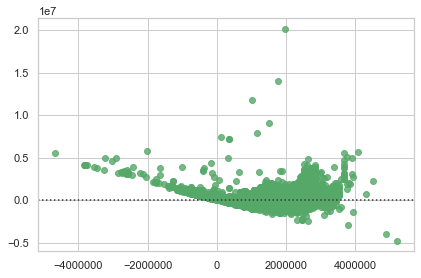

In [198]:
ax = sns.residplot(d1.predictions,residuals,lowess = True,color = 'g')
ax.set(xlabel = 'Fitted',ylabel = 'residuals')
plt.show()

In [ ]:
# lets do sqrt transformation.

d3 = train1.copy(deep = True)

d_final = d3.transform(lambda x : x ** 0.5)
d_final.head()

In [ ]:
X1 = d_final.drop('Price',axis = 1)
y = d_final['Price']

In [ ]:
X1_const = sm.add_constant(X1)
model_n = sm.OLS(y,X1_const).fit()
model_n.summary()

In [195]:
lr = LinearRegression()
from sklearn.model_selection import cross_val_score

lr_score= cross_val_score(lr, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [196]:
np.mean(lr_score)

-453007.98985398374

In [201]:
train_n = train1.drop(['Location','Price'],axis =1)
test_n = test1.drop('Location',axis = 1)
train_ns = sc.fit_transform(train_n)
test_ns = sc.transform(test_n)

In [202]:
lr = LinearRegression()
from sklearn.model_selection import cross_val_score

lr_mse= cross_val_score(lr, train_ns, y,cv=5, scoring='neg_root_mean_squared_error')

In [203]:
np.mean(lr_mse)

-452918.8501298896

In [206]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=800,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(train_ns,y)

In [207]:

xgb_results= cross_val_score(xgb, train_ns, y,cv=5, scoring='neg_root_mean_squared_error')

In [208]:
np.mean(xgb_results)

-226590.955543249

In [209]:
ypred_xgb1 = xgb_model.predict(test_ns)



In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_n,y,test_size=0.3,random_state=7)

In [211]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [212]:
from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_tests,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [254]:

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=2500, **lgb_params, random_state=123456789, n_jobs=-1)
lgb.fit(X_trains, y_train, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 100 rounds
[100]	valid's rmse: 433192
[200]	valid's rmse: 313446
[300]	valid's rmse: 280399
[400]	valid's rmse: 271249
[500]	valid's rmse: 267676
[600]	valid's rmse: 265603
[700]	valid's rmse: 264223
[800]	valid's rmse: 263139
[900]	valid's rmse: 262443
[1000]	valid's rmse: 261848
[1100]	valid's rmse: 261412
[1200]	valid's rmse: 261008
[1300]	valid's rmse: 260649
[1400]	valid's rmse: 260410
[1500]	valid's rmse: 260128
[1600]	valid's rmse: 259888
[1700]	valid's rmse: 259725
[1800]	valid's rmse: 259507
[1900]	valid's rmse: 259373
[2000]	valid's rmse: 259271
[2100]	valid's rmse: 259101
[2200]	valid's rmse: 259170
Early stopping, best iteration is:
[2122]	valid's rmse: 259071


2122

In [255]:

clf_lgb=LGBMRegressor(n_estimators=int(lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(train_ns, y)

In [256]:
lgb_mse=cross_val_score(X=train_ns,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [257]:
np.mean(lgb_mse)

-227198.18779352139

In [218]:
ypred_lgb = lgb_model.predict(test_ns)

In [240]:
grd = GradientBoostingRegressor(learning_rate =0.01,n_estimators=500,max_depth=6)
grd_model=grd.fit(train_ns,y)

In [241]:
grd_mse=cross_val_score(X=train_ns,y=y,estimator=grd,scoring='neg_root_mean_squared_error',cv=5)

In [243]:
np.mean(grd_mse)

-230395.42071879734

In [242]:
ypred_grd = grd_model.predict(test_ns)

In [223]:
ypred1 =(0.7*ypred_xgb1)+(ypred_lgb*0.15)
ypred1

array([ 394254.64198792, 1107282.23487112, 1862363.35508801, ...,
        350975.9367432 , 1080669.72834395,  563727.46411801])

In [281]:
ypred2 =(0.8*ypred_xgbn)+(ypred_lgb*0.15)+(ypred_grd*0.05)
ypred2

array([ 397331.27700832, 1064822.23535195, 1600562.92598847, ...,
        347614.86531233, 1060832.70860209,  577267.75205945])

In [282]:
car1 =pd.DataFrame(ypred2,columns=['Price'])

In [264]:
car1.shape

(5615, 1)

In [283]:
ID = pd.DataFrame(test1['Id'],columns = ['Id'])

In [284]:
car_price = pd.concat([ID,car1],axis =1)

In [285]:
car_price.to_csv('D:\submission5.csv',index=False)

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [247]:
rf=RandomForestRegressor(n_estimators = 800,max_depth = 10)

rf_results = cross_val_score(rf, train_ns, y,scoring='neg_root_mean_squared_error',cv = 5)

KeyboardInterrupt: 

In [ ]:
np.mean(rf_results)

In [ ]:
model_rf = rf.fit(train_ns,y)
ypred_rf = model_rf.predict(test_ns)

In [274]:
train_ns1 = train_n.drop('Id',axis =1)
test_ns1 = test_n.drop('Id',axis = 1)

In [275]:
train_s = sc.fit_transform(train_ns1)
test_s = sc.transform(test_ns1)

In [48]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=800,
 max_depth=10,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(trains1,y)

In [49]:
from sklearn.model_selection import cross_val_score
xgb_results1= cross_val_score(xgb, trains1, y,cv=5, scoring='neg_root_mean_squared_error')

In [50]:
np.mean(xgb_results1)

-233199.50848412956

In [39]:
ypred_xgbn = xgb_model.predict(tests1)